In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import imageio

In [5]:
ab = imageio.imread('ab2.jpg')
ab_hand = imageio.imread('ab_hand.png')
ab_body = imageio.imread('ab_body.png')
ab_hair = imageio.imread('ab_hair.png')
ab_bottom = imageio.imread('ab_bottom.png')
ab_face = imageio.imread('ab_face.png')

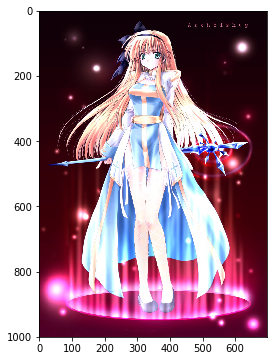

In [8]:
plt.figure(figsize=(8,6))
plt.imshow(ab)

In [14]:
np.all(ab_hand == [255,255,255,0],axis=2).shape

(1000, 697)

In [16]:
np.all(ab_hand == [255,255,255,0],axis=2)

False

In [130]:
ab_hand[0,0]

Image([255, 255, 255,   0], dtype=uint8)

In [50]:
ab_masked = ab.copy()
#mask = ~np.repeat(np.all(ab_hand == [255,255,255,0],axis=2,keepdims=True), 3, axis=2)
mask = np.all(ab_bottom == [255,255,255,0],axis=2)
ab_masked[mask] = [255,255,255]

In [51]:
np.prod(mask.shape)

697000

In [52]:
np.sum(mask)

541150

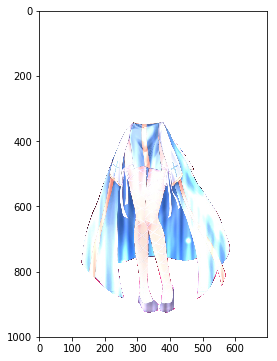

In [54]:
plt.figure(figsize=(8,6))
plt.imshow(ab_masked)

In [140]:
def paste(source, source_mask, target, target_box):
    target_left, target_right, target_top, target_bottom = target_box
    #target_right = target_left + target_width - 1
    #target_bottom = target_top + target_height - 1
    y, x = np.where(source_mask)
    source_top, source_bottom, source_left, source_right = min(y), max(y), min(x), max(x)
    #print(source_top, source_bottom, source_left, source_right)
    #source_width = source_bottom - source_top + 1
    #source_height = source_right - source_left + 1
    
    for i in range(target_top, target_bottom+1):
        for j in range(target_left, target_right+1):
            jp = (j-target_left)/(target_right - target_left)
            ip = (i-target_top)/(target_bottom - target_top)
            jq = int(np.round(jp * (source_right - source_left)+source_left))
            iq = int(np.round(ip * (source_bottom - source_top)+source_top))
            #print(i,j,iq,jq)
            if source_mask[iq,jq]:
                target[i,j] = source[iq, jq]

In [117]:
ab_hand_mask = ~np.all(ab_hand == [255,255,255,0],axis=2)
ab_body_mask = ~np.all(ab_body == [255,255,255,0],axis=2)
ab_hair_mask = ~np.all(ab_hair == [255,255,255,0],axis=2)
ab_bottom_mask = ~np.all(ab_bottom == [255,255,255,0],axis=2)
ab_face_mask = ~np.all(ab_face == [255,255,255,0],axis=2)

In [133]:
y, x = np.where(ab_bottom_mask)

In [134]:
source_top, source_bottom, source_left, source_right = min(y), max(y), min(x), max(x)

In [135]:
import matplotlib.patches as patches


In [136]:
rect = patches.Rectangle((source_left,source_top),
                         source_right-source_left,
                         source_bottom-source_top,
                         linewidth=1,edgecolor='r',facecolor='none')


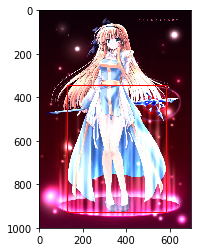

In [137]:
plt.imshow(ab)
plt.gca().add_patch(rect)

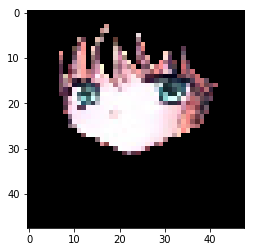

In [143]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_face_mask, target, (7,48-7,3,32))
plt.imshow(target)

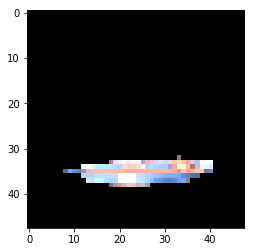

In [144]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_body_mask, target, (7,48-7,32,38))
plt.imshow(target)

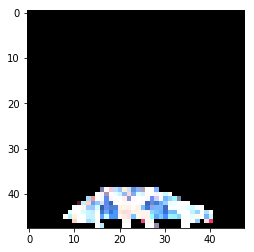

In [145]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_bottom_mask, target, (7,48-7,38,48))
plt.imshow(target)

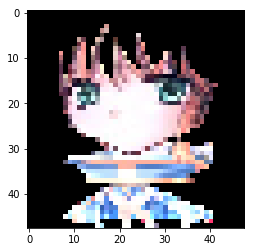

In [148]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_body_mask, target, (7,48-7,28,38))
paste(ab, ab_face_mask, target, (7,48-7,3,32))
paste(ab, ab_bottom_mask, target, (7,48-7,38,48))
plt.imshow(target)

In [167]:
ab_hair_face_mask = ab_hair_mask | ab_face_mask
top_idx = np.where(ab_face_mask)[0].max()
ab_top_mask = ab_hair_face_mask.copy()
ab_top_mask[top_idx:,:] = False

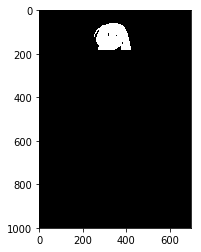

In [169]:
plt.imshow(ab_top_mask, cmap='gray')

In [170]:
ab_body_hand_mask = ab_body_mask | ab_hand_mask
ab_center_mask = ab_body_hand_mask | ab_hair_mask
bottom_idx = np.where(ab_bottom_mask)[0].min()
ab_center_mask[:top_idx,:] = False
ab_center_mask[bottom_idx:,:] = False

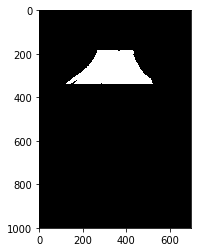

In [171]:
plt.imshow(ab_center_mask, cmap='gray')

In [173]:
ab_footer_mask = ab_bottom_mask | ab_hair_mask
ab_footer_mask[:bottom_idx,:] = False

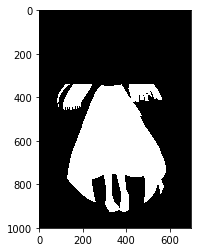

In [174]:
plt.imshow(ab_footer_mask, cmap='gray')

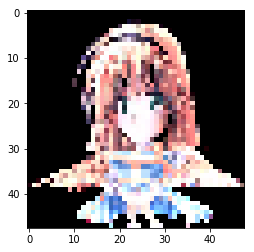

In [188]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_center_mask, target, (0,47,28,38))
paste(ab, ab_top_mask, target, (10,48-9,2,30))
paste(ab, ab_footer_mask, target, (7,48-7,37,48))
plt.imshow(target)

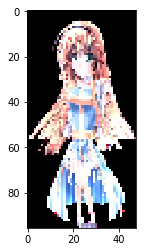

In [195]:
target = np.zeros((96,48,3), dtype=np.uint8)
paste(ab, ab_center_mask, target, (0,47,26,56))
paste(ab, ab_top_mask, target, (11,48-11,4,30))
paste(ab, ab_footer_mask, target, (5,48-5,56,96))
plt.imshow(target)

In [196]:
ab_mask = ab_center_mask | ab_top_mask | ab_footer_mask

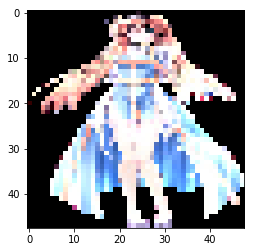

In [199]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,48))
plt.imshow(target)

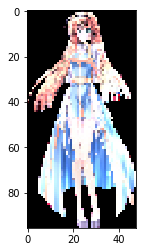

In [200]:
target = np.zeros((96,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,96))
plt.imshow(target)

In [205]:
def paste(source, source_mask, target, target_box, i_map = None, j_map = None):
    target_left, target_right, target_top, target_bottom = target_box
    #target_right = target_left + target_width - 1
    #target_bottom = target_top + target_height - 1
    y, x = np.where(source_mask)
    source_top, source_bottom, source_left, source_right = min(y), max(y), min(x), max(x)
    #print(source_top, source_bottom, source_left, source_right)
    #source_width = source_bottom - source_top + 1
    #source_height = source_right - source_left + 1
    
    for i in range(target_top, target_bottom+1):
        for j in range(target_left, target_right+1):
            jp = (j-target_left)/(target_right - target_left)
            ip = (i-target_top)/(target_bottom - target_top)
            if i_map:
                ip = i_map(ip)
            if j_map:
                jp = j_map(jp)
            jq = int(np.round(jp * (source_right - source_left)+source_left))
            iq = int(np.round(ip * (source_bottom - source_top)+source_top))
            #print(i,j,iq,jq)
            if source_mask[iq,jq]:
                target[i,j] = source[iq, jq]

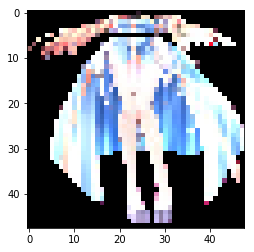

In [206]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,47), i_map= lambda x: x**0.5)
plt.imshow(target)

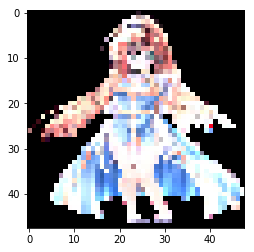

In [207]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,47), i_map= lambda x: x**1.5)
plt.imshow(target)

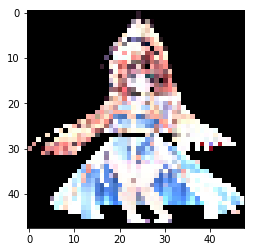

In [208]:
target = np.zeros((48,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,47), i_map= lambda x: x**2)
plt.imshow(target)

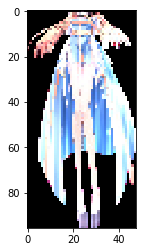

In [209]:
target = np.zeros((96,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,96), i_map= lambda x: x**0.5)
plt.imshow(target)

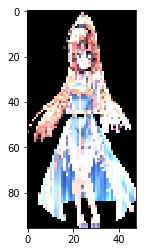

In [210]:
target = np.zeros((96,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,96), i_map= lambda x: x**1.5)
plt.imshow(target)

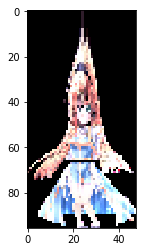

In [212]:
target = np.zeros((96,48,3), dtype=np.uint8)
paste(ab, ab_mask, target, (0,48,0,96), i_map= lambda x: x**3)
plt.imshow(target)